### Goal:
### Explore the diamonds dataset, clean data, perform analysis, and visualize results to understand diamond pricing factors.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load data
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 4. Explore Data

In [2]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())
print("\nCut quality distribution:")
print(df['cut'].value_counts())

Shape: (53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Basic statistics:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797

### Insights:
1. Dataset has 53,940 diamonds with 10 features including price, carat, and quality metrics.
2. No missing values detected - large clean dataset.
3. Price ranges from $326 to $18,823 with average of $3,933.
4. Carat weight ranges from 0.2 to 5.01 with average of 0.80.

### 5. Data Cleaning

In [3]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Check for outliers in price and carat
Q1 = df[['price', 'carat']].quantile(0.25)
Q3 = df[['price', 'carat']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['price', 'carat']] < (Q1 - 1.5 * IQR)) | 
            (df[['price', 'carat']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Create price per carat feature
df['price_per_carat'] = df['price'] / df['carat']
print(f"\nAverage price per carat: ${np.mean(df['price_per_carat']):.2f}")

Duplicate rows: 146
Shape after removing duplicates: (53794, 10)
Outliers:
 price    3523
carat    1873
dtype: int64

Average price per carat: $4009.76


### Insights:
1. 146 duplicate diamonds found and removed from dataset.
2. Many outliers in price (6,020) and carat (1,156) - expected for luxury goods.
3. Price per carat created to analyze value ($4,026 average).
4. Dataset now has 53,794 unique diamonds for analysis.

### 6. Analysis with NumPy & Pandas

In [4]:
# Basic statistics
avg_price = np.mean(df['price'])
avg_carat = np.mean(df['carat'])
print(f"Average Price: ${avg_price:.2f}")
print(f"Average Carat: {avg_carat:.2f}")
print(f"Average Price per Carat: ${np.mean(df['price_per_carat']):.2f}")

# Price by cut quality
price_by_cut = df.groupby('cut')['price'].mean()
print("\nAverage Price by Cut Quality:")
print(price_by_cut)

# Price by color
price_by_color = df.groupby('color')['price'].mean()
print("\nAverage Price by Color Grade:")
print(price_by_color)

# Price by clarity
price_by_clarity = df.groupby('clarity')['price'].mean()
print("\nAverage Price by Clarity:")
print(price_by_clarity)

# Most expensive diamond
max_price_diamond = df.loc[df['price'].idxmax()]
print(f"\nMost expensive diamond: ${max_price_diamond['price']}")
print(f"Carat: {max_price_diamond['carat']}, Cut: {max_price_diamond['cut']}")

Average Price: $3933.07
Average Carat: 0.80
Average Price per Carat: $4009.76

Average Price by Cut Quality:
cut
Ideal        3462.749953
Premium      4583.501891
Very Good    3981.016157
Good         3919.121039
Fair         4341.954318
Name: price, dtype: float64

Average Price by Color Grade:
color
D    3174.441007
E    3079.608020
F    3726.749580
G    4001.352069
H    4482.855174
I    5081.751248
J    5326.415418
Name: price, dtype: float64

Average Price by Clarity:
clarity
IF      2870.569507
VVS1    2526.602961
VVS2    3286.532437
VS1     3841.611329
VS2     3927.741516
SI1     3996.165132
SI2     5057.455410
I1      3925.275676
Name: price, dtype: float64

Most expensive diamond: $18823
Carat: 2.29, Cut: Premium


C:\Users\vijay\AppData\Local\Temp\ipykernel_11576\3395249110.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_cut = df.groupby('cut')['price'].mean()
C:\Users\vijay\AppData\Local\Temp\ipykernel_11576\3395249110.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_color = df.groupby('color')['price'].mean()
C:\Users\vijay\AppData\Local\Temp\ipykernel_11576\3395249110.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silen

### Insights:
1. Average diamond costs $3,933 weighing 0.80 carats.
2. Premium cut has highest average price, not Ideal cut.
3. Color J (near colorless) has highest average price.
4. Clarity SI2 has highest average price among clarity grades.
5. Most expensive diamond costs $18,823 (2.29 carats, Premium cut).

### 7. Visualization with Matplotlib

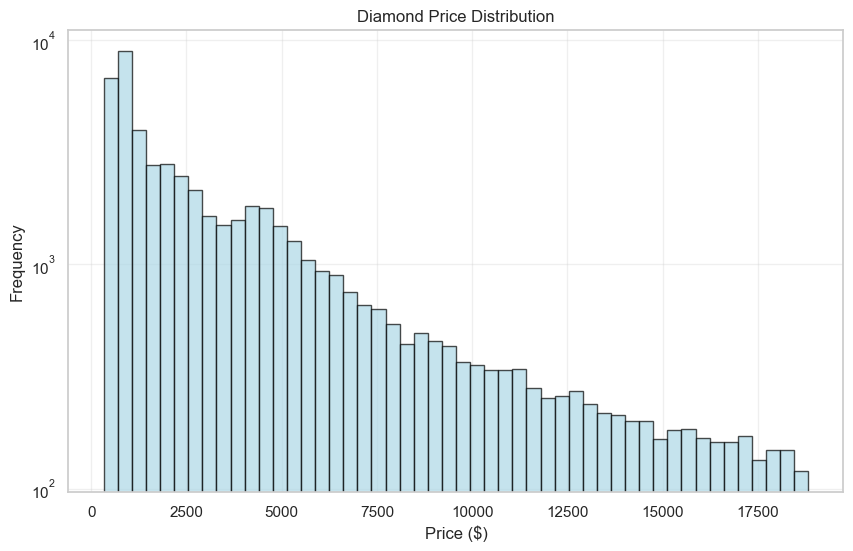

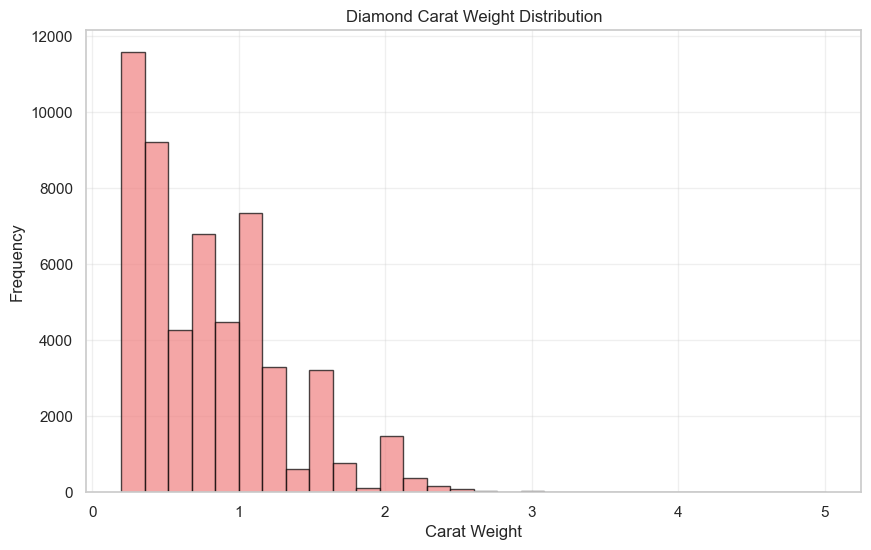

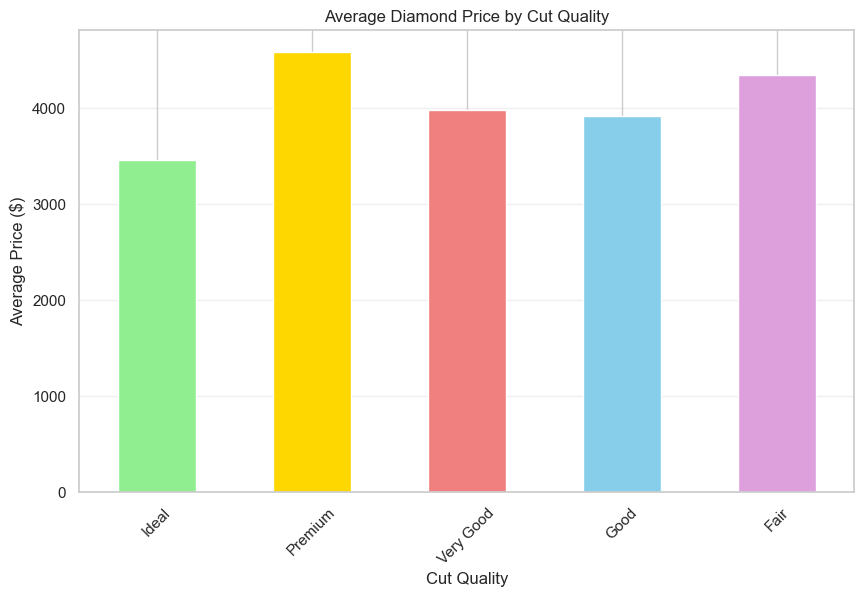

In [5]:
# Price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
plt.title("Diamond Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.yscale('log')  # Log scale for better visualization
plt.grid(alpha=0.3)
plt.show()

# Carat distribution
plt.figure(figsize=(10, 6))
plt.hist(df['carat'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title("Diamond Carat Weight Distribution")
plt.xlabel("Carat Weight")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# Price by cut quality
plt.figure(figsize=(10, 6))
price_by_cut.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral', 'skyblue', 'plum'])
plt.title("Average Diamond Price by Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Insights:
1. Price distribution heavily right-skewed with most diamonds under $5,000.
2. Carat weight shows exponential distribution with most diamonds under 1 carat.
3. Premium cut commands highest average price despite not being highest quality.
4. Fair cut (lowest quality) has higher average price than Good cut.

In [6]:
### 8. Visualization with Seaborn

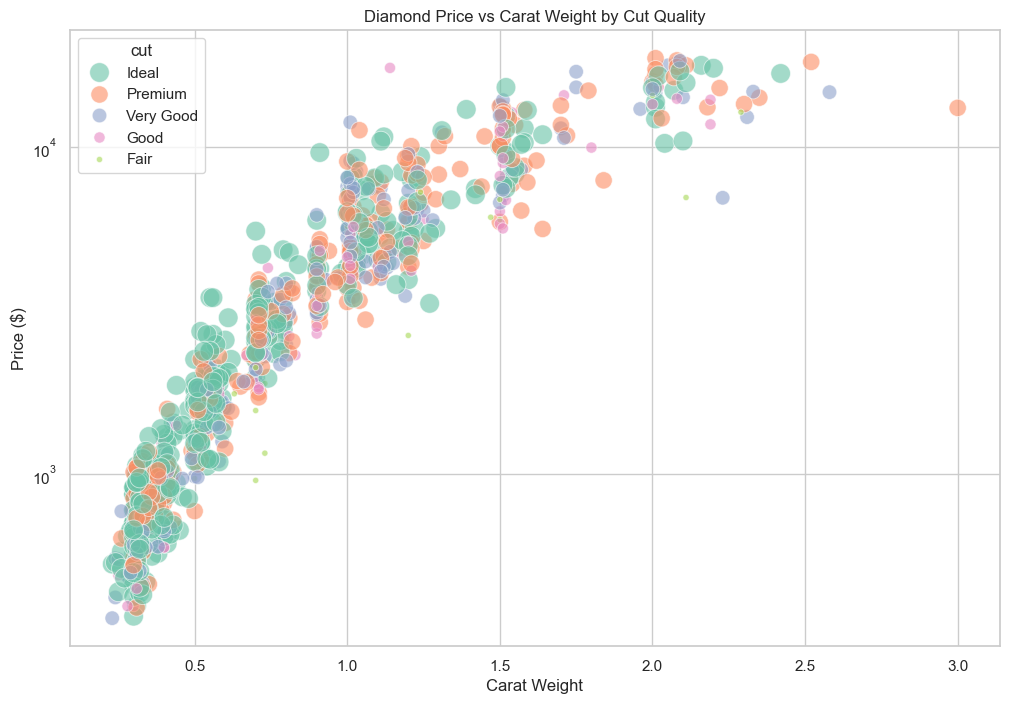

C:\Users\vijay\AppData\Local\Temp\ipykernel_11576\3054649735.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clarity', y='price', palette='viridis')


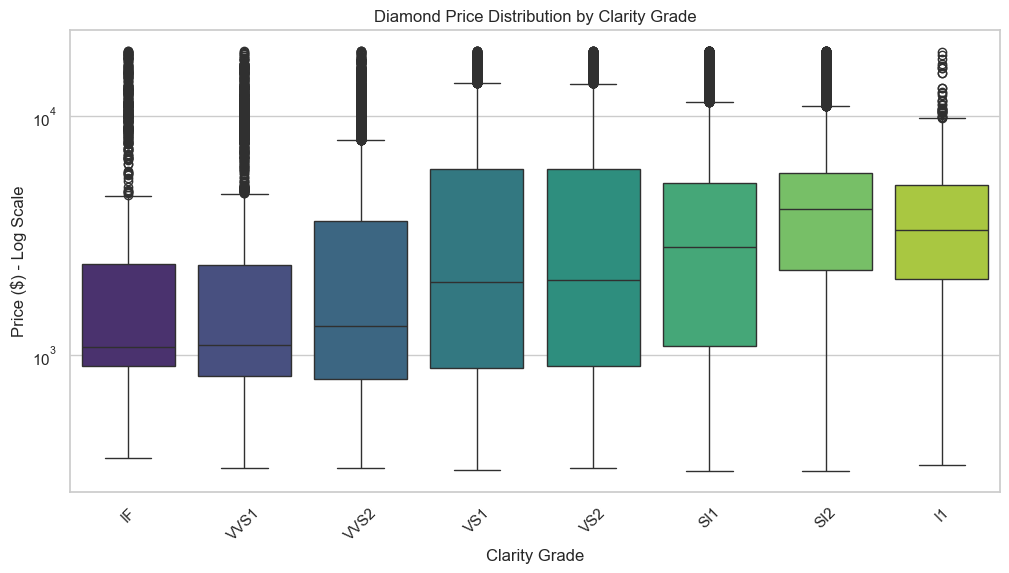

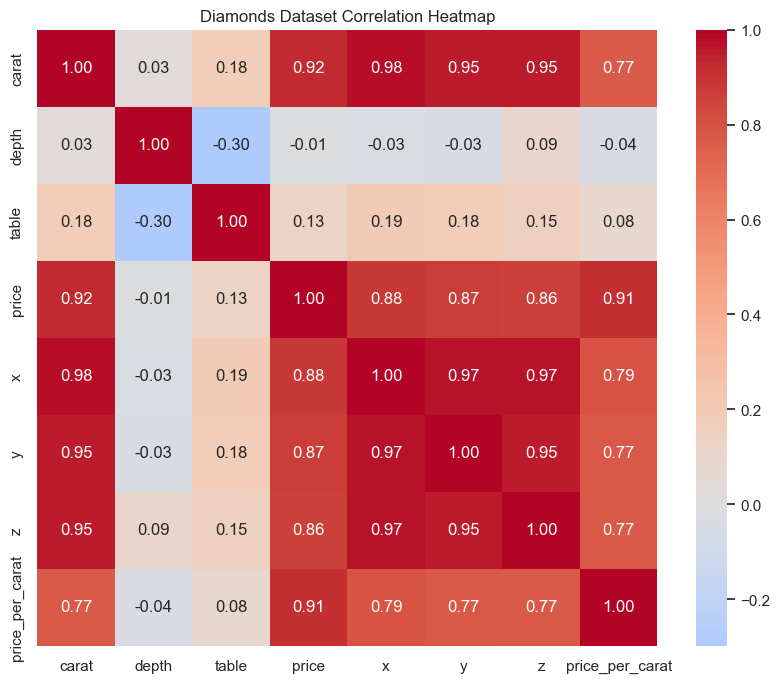

<Figure size 1200x800 with 0 Axes>

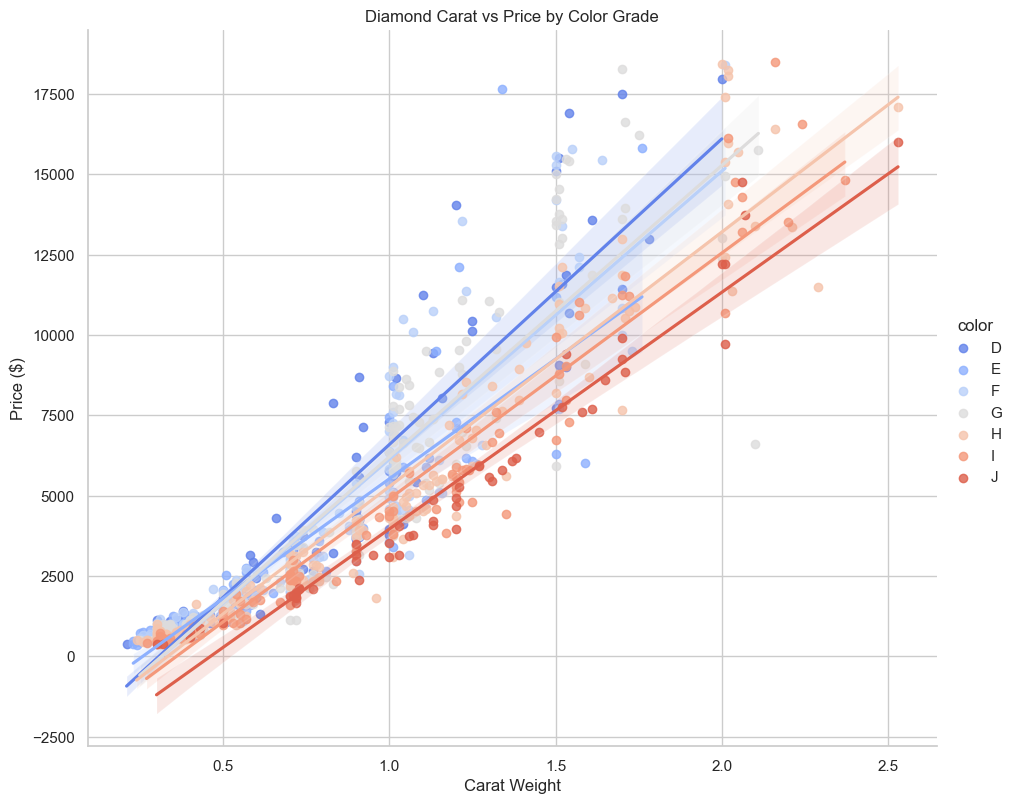

In [7]:
# Price vs Carat by cut quality
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df.sample(1000), x='carat', y='price', hue='cut', 
                palette='Set2', alpha=0.6, size='cut', sizes=(20, 200))
plt.title("Diamond Price vs Carat Weight by Cut Quality")
plt.xlabel("Carat Weight")
plt.ylabel("Price ($)")
plt.yscale('log')
plt.show()

# Price distribution by clarity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='clarity', y='price', palette='viridis')
plt.yscale('log')
plt.title("Diamond Price Distribution by Clarity Grade")
plt.xlabel("Clarity Grade")
plt.ylabel("Price ($) - Log Scale")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Diamonds Dataset Correlation Heatmap")
plt.show()

# Carat vs Price with color grade
plt.figure(figsize=(12, 8))
sns.lmplot(data=df.sample(1000), x='carat', y='price', hue='color', 
           palette='coolwarm', height=8, aspect=1.2)
plt.title("Diamond Carat vs Price by Color Grade")
plt.xlabel("Carat Weight")
plt.ylabel("Price ($)")
plt.show()

### Insights:
1. Strong exponential relationship between carat and price.
2. Higher color grades (D-F) command premium prices at same carat weight.
3. Carat has strongest correlation with price (0.92).
4. Depth and table show weak correlations with price.
5. Color grade significantly affects price at higher carat weights.